In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import warnings
from matplotlib import pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from statsmodels.regression.linear_model import OLS
from sklearn.ensemble import RandomForestRegressor
import itertools

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn
import pycountry_convert as pc

from sklearn.tree import export_graphviz
import pydot
from statsmodels.api import add_constant
import itertools

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install pycountry_convert

     |████████████████████████████████| 10.1 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 207 kB 52.8 MB/s 
     |████████████████████████████████| 296 kB 44.5 MB/s 
     |████████████████████████████████| 296 kB 55.1 MB/s 
     |████████████████████████████████| 280 kB 56.2 MB/s 
     |████████████████████████████████| 280 kB 54.5 MB/s 
     |████████████████████████████████| 280 kB 56.4 MB/s 
     |████████████████████████████████| 280 kB 47.6 MB/s 
     |████████████████████████████████| 279 kB 57.9 MB/s 
     |████████████████████████████████| 279 kB 43.2 MB/s 
     |████████████████████████████████| 272 kB 39.6 MB/s 
     |████████████████████████████████| 272 kB 48.0 MB/s 
     |████████████████████████████████| 272 kB 49.4 MB/s 
     |████████████████████████████████| 270 kB 57.0 MB/s 
     |████████████████████████████████| 270 kB 55.4 MB/s 
    

In [ ]:
dataset1 = pd.read_csv("drive/MyDrive/diamonds.csv")

In [ ]:
dataset2_11 = pd.read_csv("drive/MyDrive/ECE219/pp_gasemission/gt_2011.csv")
dataset2_12 = pd.read_csv("drive/MyDrive/ECE219/pp_gasemission/gt_2012.csv")
dataset2_13 = pd.read_csv("drive/MyDrive/ECE219/pp_gasemission/gt_2013.csv")
dataset2_14 = pd.read_csv("drive/MyDrive/ECE219/pp_gasemission/gt_2014.csv")
dataset2_15 = pd.read_csv("drive/MyDrive/ECE219/pp_gasemission/gt_2015.csv")

In [ ]:
dataset2_11["year"] = "2011"
dataset2_11.to_csv("dataset2_11.csv", index=False)

dataset2_12["year"] = "2012"
dataset2_12.to_csv("dataset2_12.csv", index=False)

dataset2_13["year"] = "2013"
dataset2_13.to_csv("dataset2_13.csv", index=False)

dataset2_14["year"] = "2014"
dataset2_14.to_csv("dataset2_14.csv", index=False)

dataset2_15["year"] = "2015"
dataset2_15.to_csv("dataset2_15.csv", index=False)

In [ ]:
concat = pd.concat([dataset2_11, dataset2_12, dataset2_13, dataset2_14, dataset2_15])

In [ ]:
concat.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,year
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2011
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2011
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2011
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2011
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2011


In [ ]:
concat.shape

(36733, 12)

In [ ]:
concat.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,year
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2011
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2011
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2011
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2011
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2011


In [ ]:
dataset1 = dataset1.drop(columns=['Unnamed: 0'])

In [ ]:
dataset1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


## Deep Copy the dataset1 and dataset2 will have the encoded features

In [ ]:
dataset2 = dataset1.copy(deep=True)

## Numerical Encoding for the Diamonds Dataset 

In [ ]:
#Numerical Encodings

cut_dict = {'Fair' : 1,
           'Good' : 2,
           'Very Good': 3,
           'Premium': 4,
           'Ideal': 5}

color_dict = {'J' : 1,
           'I' : 2,
           'H': 3,
           'G': 4,
           'F': 5,
           'E': 6,
           'D': 7}


clarity_dict = {'I1' : 1,
           'SI2' : 2,
           'SI1': 3,
           'VS2': 4,
           'VS1': 5,
           'VVS2': 6,
           'VVS1': 7,
           'IF': 8}



In [ ]:
dataset2['cut_encoded'] = dataset2.cut.map(cut_dict)
dataset2['color_encoded'] = dataset2.color.map(color_dict)
dataset2['clarity_encoded'] = dataset2.clarity.map(clarity_dict)

In [ ]:
dataset2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43,5,6,2
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31,4,6,3
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31,2,6,5
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75,2,1,2


In [ ]:
cat_list = ['cut','color','clarity']
for item in cat_list:
  seaborn.boxplot(x = dataset1[item],y = dataset1['price'], order=list(set(dataset1[item])))
  plt.savefig('Q3a'+'price'+'_'+item+'.png',dpi=300,bbox_inches='tight')
  plt.show()


## Trend Plots for all features 

In [ ]:
for i in dataset2_11.columns:
  print(i)

AT
AP
AH
AFDP
GTEP
TIT
TAT
TEY
CDP
CO
NOX


## Question 5  - Histogram Diamond 

In [ ]:
dataset1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


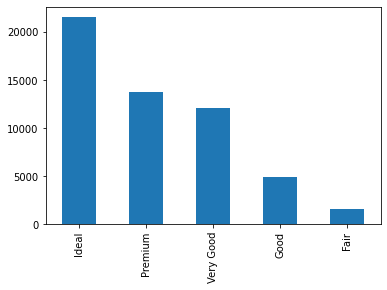

In [ ]:
dataset1['cut'].value_counts().plot(kind='bar')

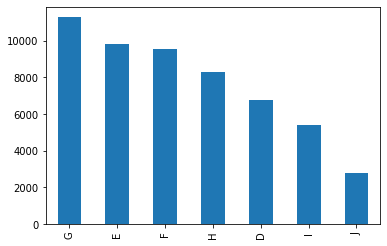

In [ ]:
dataset1['color'].value_counts().plot(kind='bar')


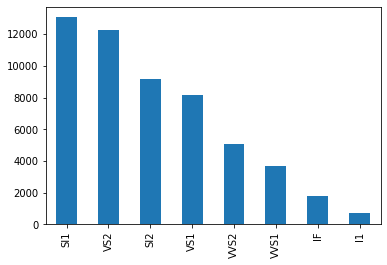

In [ ]:
dataset1['clarity'].value_counts().plot(kind='bar')


## Question 6 - TREND PLOTS


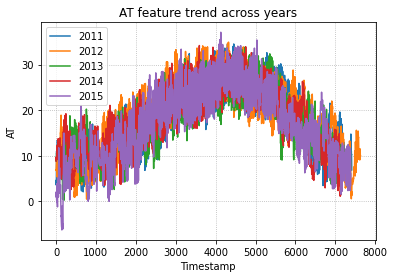

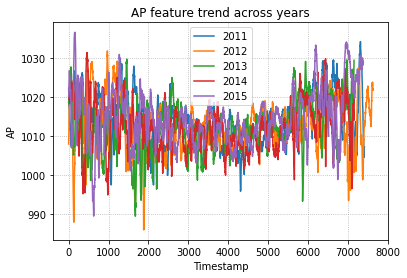

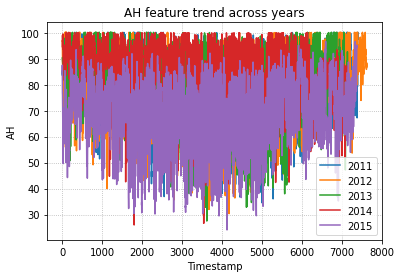

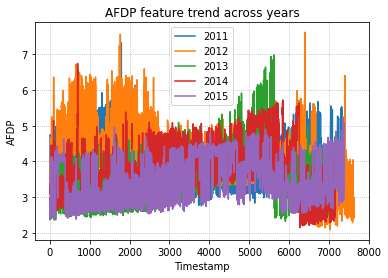

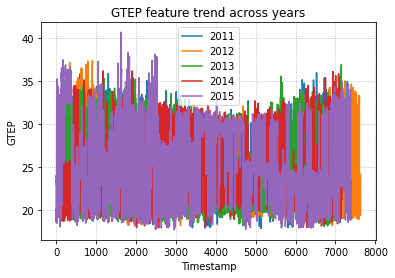

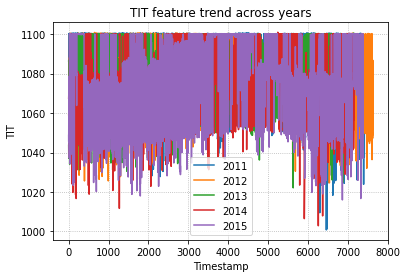

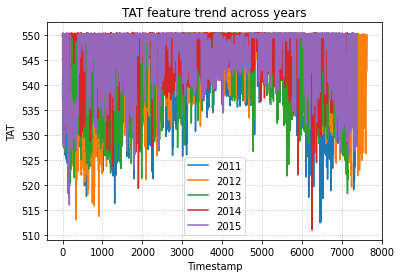

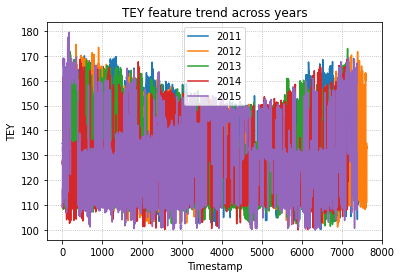

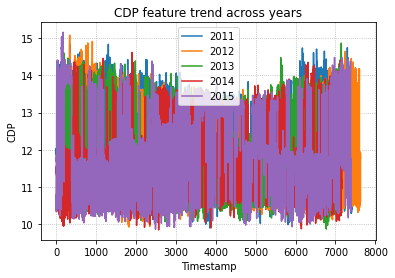

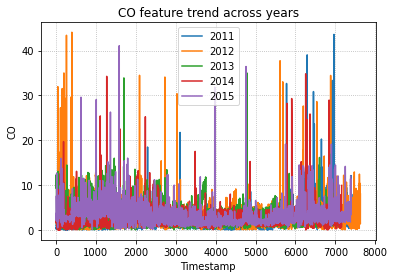

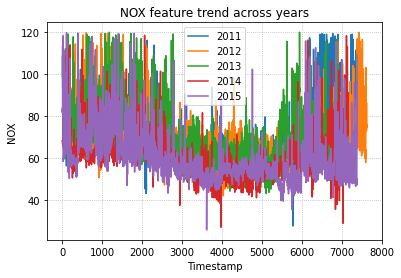

In [ ]:
masterplot = []
for col in dataset2_11.columns :
  plt.plot(np.arange(1,7412,1),dataset2_11[col])
  plt.plot(np.arange(1,7629,1),dataset2_12[col])
  plt.plot(np.arange(1,7153,1),dataset2_13[col])
  plt.plot(np.arange(1,7159,1),dataset2_14[col])
  plt.plot(np.arange(1,7385,1),dataset2_15[col])

  plt.legend(['2011','2012','2013','2014','2015'],loc='best')
  plt.grid(linestyle=':')
  plt.xlabel('Timestamp')
  plt.ylabel(col)
  plt.title(col + ' feature trend across years')
  plt.show()
  

## Question 7 - Theory

## Question 8 - Theory

## Question 9

In [ ]:
diamonds = dataset2.copy(deep=True)

In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43,5,6,2
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31,4,6,3
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31,2,6,5
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75,2,1,2


In [ ]:
diamonds = diamonds.drop(columns=['cut','color','clarity'])

In [ ]:
diamonds.head()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,61.5,55.0,330,3.95,3.98,2.43,5,6,2
1,0.21,59.8,61.0,327,3.89,3.84,2.31,4,6,3
2,0.23,56.9,65.0,328,4.05,4.07,2.31,2,6,5
3,0.29,62.4,58.0,337,4.20,4.23,2.63,4,2,4
4,0.31,63.3,58.0,338,4.34,4.35,2.75,2,1,2


In [ ]:
datastand = diamonds.copy(deep=True)

In [ ]:
diam_scale = StandardScaler()

In [ ]:
ds = diam_scale.fit_transform(datastand)

In [ ]:
ds

array([[-1.19816781, -0.17409151, -1.09967199, ...,  0.98147332,
         0.93716275, -1.24521508],
       [-1.24036129, -1.36073849,  1.58552871, ...,  0.08588908,
         0.93716275, -0.63809506],
       [-1.19816781, -3.38501862,  3.37566251, ..., -1.70527938,
         0.93716275,  0.57614496],
       ...,
       [-0.20662095,  0.73334442,  1.13799526, ..., -0.80969515,
         1.52502147, -0.63809506],
       [ 0.13092691, -0.52310533,  0.24292836, ...,  0.08588908,
        -0.8264134 , -1.24521508],
       [-0.10113725,  0.31452784, -1.09967199, ...,  0.98147332,
         1.52502147, -1.24521508]])

In [ ]:
X

In [ ]:
Ydiam_S = ds[:,3]

## Extraction of features and labels, Standardizing

In [ ]:
Xdiam = ds.loc[:, diamonds.columns != 'price'].to_numpy()
Ydiam = ds.price

In [ ]:
Ydiam.shape

(53940,)

In [ ]:
Xdiam

array([[ 0.23, 61.5 , 55.  , ...,  5.  ,  6.  ,  2.  ],
       [ 0.21, 59.8 , 61.  , ...,  4.  ,  6.  ,  3.  ],
       [ 0.23, 56.9 , 65.  , ...,  2.  ,  6.  ,  5.  ],
       ...,
       [ 0.7 , 62.8 , 60.  , ...,  3.  ,  7.  ,  3.  ],
       [ 0.86, 61.  , 58.  , ...,  4.  ,  3.  ,  2.  ],
       [ 0.75, 62.2 , 55.  , ...,  5.  ,  7.  ,  2.  ]])

In [ ]:
diam_scale = StandardScaler()
Xdiam_S = diam_scale.fit_transform(Xdiam)


In [ ]:
Xdiam_S

array([[-1.19816781, -0.17409151, -1.09967199, ...,  0.98147332,
         0.93716275, -1.24521508],
       [-1.24036129, -1.36073849,  1.58552871, ...,  0.08588908,
         0.93716275, -0.63809506],
       [-1.19816781, -3.38501862,  3.37566251, ..., -1.70527938,
         0.93716275,  0.57614496],
       ...,
       [-0.20662095,  0.73334442,  1.13799526, ..., -0.80969515,
         1.52502147, -0.63809506],
       [ 0.13092691, -0.52310533,  0.24292836, ...,  0.08588908,
        -0.8264134 , -1.24521508],
       [-0.10113725,  0.31452784, -1.09967199, ...,  0.98147332,
         1.52502147, -1.24521508]])

## Testing out diff Reg 

In [ ]:
diamonds_RMSE_MIR = []
diamonds_RMSE_FR = []


diamonds_RMSE_MIR_LR= []
diamonds_RMSE_FR_LR = []

diamonds_RMSE_MIR_RR= []
diamonds_RMSE_FR_RR = []


for i in range(1,Xdiam.shape[1]):
    print('Testing LR, diamonds dataset for k = ', i)
    Xdiam_M = SelectKBest(score_func=mutual_info_regression, k=i).fit_transform(Xdiam, Ydiam)
    Xdiam_F = SelectKBest(score_func=f_regression, k=i).fit_transform(Xdiam, Ydiam)
    
    diamOut = cross_validate(LinearRegression(), Xdiam_M, Ydiam, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    diamonds_RMSE_MIR.append(diamOut['test_neg_root_mean_squared_error'].mean())

    diamout = cross_validate(LinearRegression(), Xdiam_F, Ydiam, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    diamonds_RMSE_FR.append(diamOut['test_neg_root_mean_squared_error'].mean())
    
    print('Testing RR, diamonds dataset for k = ', i)
    diamOut = cross_validate(Ridge(), Xdiam_M, Ydiam, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    diamonds_RMSE_MIR_RR.append(diamOut['test_neg_root_mean_squared_error'].mean())
    diamOut = cross_validate(Ridge(), Xdiam_F, Ydiam, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    diamonds_RMSE_FR_RR.append(diamOut['test_neg_root_mean_squared_error'].mean())
    
    print('Testing LaR, diamonds dataset for k = ', i)
    diamOut = cross_validate(Lasso(), Xdiam_M, Ydiam, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    diamonds_RMSE_MIR_LR.append(diamOut['test_neg_root_mean_squared_error'].mean())
    diamOut = cross_validate(Lasso(), Xdiam_F, Ydiam, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    diamonds_RMSE_FR_LR.append(diamOut['test_neg_root_mean_squared_error'].mean())


Testing LR, diamonds dataset for k =  1
Testing RR, diamonds dataset for k =  1
Testing LaR, diamonds dataset for k =  1
Testing LR, diamonds dataset for k =  2
Testing RR, diamonds dataset for k =  2
Testing LaR, diamonds dataset for k =  2
Testing LR, diamonds dataset for k =  3
Testing RR, diamonds dataset for k =  3
Testing LaR, diamonds dataset for k =  3
Testing LR, diamonds dataset for k =  4
Testing RR, diamonds dataset for k =  4
Testing LaR, diamonds dataset for k =  4
Testing LR, diamonds dataset for k =  5
Testing RR, diamonds dataset for k =  5
Testing LaR, diamonds dataset for k =  5
Testing LR, diamonds dataset for k =  6
Testing RR, diamonds dataset for k =  6
Testing LaR, diamonds dataset for k =  6
Testing LR, diamonds dataset for k =  7
Testing RR, diamonds dataset for k =  7
Testing LaR, diamonds dataset for k =  7
Testing LR, diamonds dataset for k =  8
Testing RR, diamonds dataset for k =  8
Testing LaR, diamonds dataset for k =  8


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

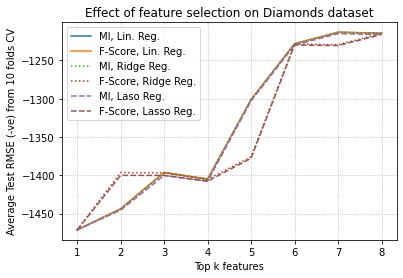

In [ ]:
plt.plot(np.arange(1,len(diamonds_RMSE_MIR)+1,1),diamonds_RMSE_MIR)
plt.plot(np.arange(1,len(diamonds_RMSE_FR)+1,1),diamonds_RMSE_FR)
plt.plot(np.arange(1,len(diamonds_RMSE_MIR_RR)+1,1),diamonds_RMSE_MIR_RR,':')
plt.plot(np.arange(1,len(diamonds_RMSE_FR_RR)+1,1),diamonds_RMSE_FR_RR,':')
plt.plot(np.arange(1,len(diamonds_RMSE_MIR_LR)+1,1),diamonds_RMSE_MIR_LR,'--')
plt.plot(np.arange(1,len(diamonds_RMSE_FR_LR)+1,1),diamonds_RMSE_FR_LR,'--')
plt.legend(['MI, Lin. Reg.','F-Score, Lin. Reg.','MI, Ridge Reg.',
            'F-Score, Ridge Reg.','MI, Laso Reg.','F-Score, Lasso Reg.'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE (-ve) from 10 folds CV')
plt.title('Effect of feature selection on Diamonds dataset')
plt.savefig('Q9a.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 9

In [ ]:
k_val = 6 # Inferred from the graph above 

#Unstandardized 
Xdiam_F = SelectKBest(score_func=f_regression, k=k_val).fit_transform(Xdiam, Ydiam)
Xdiam_MIR = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(Xdiam, Ydiam)

#Standardized 
Xdiam_FS = SelectKBest(score_func=f_regression, k=k_val).fit_transform(Xdiam_S, Ydiam_S)
Xdiam_MIRS = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(Xdiam_S, Ydiam_S)



## Linear Regression 

In [ ]:
XdiamOut = cross_validate(LinearRegression(), Xdiam_F, Ydiam_S, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• No standardization, bike dataset, F1, linear regression: Test=',XdiamOut['test_neg_root_mean_squared_error'].mean(),',Train=',XdiamOut['train_neg_root_mean_squared_error'].mean())
BikeOut = cross_validate(LinearRegression(), Xdiam_MIR, Ydiam_S, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• No standardization, bike dataset, MI, linear regression: Test=',XdiamOut['test_neg_root_mean_squared_error'].mean(),',Train=',XdiamOut['train_neg_root_mean_squared_error'].mean())
BikeOut = cross_validate(LinearRegression(), Xdiam_FS, Ydiam_S, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• Standardization, bike dataset, F1, linear regression:  Test=',XdiamOut['test_neg_root_mean_squared_error'].mean(),',Train=',XdiamOut['train_neg_root_mean_squared_error'].mean())
BikeOut = cross_validate(LinearRegression(), Xdiam_MIRS, Ydiam_S, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• Standardization, bike dataset, MI, linear regression: Test=',XdiamOut['test_neg_root_mean_squared_error'].mean(),',Train=',XdiamOut['train_neg_root_mean_squared_error'].mean())


• No standardization, bike dataset, F1, linear regression: Test= -0.3078705218517502 ,Train= -0.30621210838602225
• No standardization, bike dataset, MI, linear regression: Test= -0.3078705218517502 ,Train= -0.30621210838602225
• Standardization, bike dataset, F1, linear regression:  Test= -0.3078705218517502 ,Train= -0.30621210838602225
• Standardization, bike dataset, MI, linear regression: Test= -0.3078705218517502 ,Train= -0.30621210838602225


In [ ]:
import numpy as np

## Ridge Regression

In [ ]:
pipe_RR = Pipeline([('model', Ridge(random_state=42))])
param_grid = {
    'model__alpha': [10.0**x for x in np.arange(-5,5)]
}

In [ ]:
print("Testing Diamonds ..\n")
griddiamRR_F = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(Xdiam_F, Ydiam_S)
griddiamRR_FS = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(Xdiam_FS, Ydiam_S)
griddiamRR_M = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(Xdiam_MIR, Ydiam_S)
gridBikeRR_MS = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(Xdiam_MIRS, Ydiam_S)

Testing Diamonds ..

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
Xdiam_F

array([[0.23, 3.95, 3.98, 2.43, 6.  , 2.  ],
       [0.21, 3.89, 3.84, 2.31, 6.  , 3.  ],
       [0.23, 4.05, 4.07, 2.31, 6.  , 5.  ],
       ...,
       [0.7 , 5.66, 5.68, 3.56, 7.  , 3.  ],
       [0.86, 6.15, 6.12, 3.74, 3.  , 2.  ],
       [0.75, 5.83, 5.87, 3.64, 7.  , 2.  ]])

In [ ]:
Xdiam_FS

array([[-1.19816781, -1.58783745, -1.53619556, -1.57112919,  0.93716275,
        -1.24521508],
       [-1.24036129, -1.64132529, -1.65877419, -1.74117497,  0.93716275,
        -0.63809506],
       [-1.19816781, -1.49869105, -1.45739502, -1.74117497,  0.93716275,
         0.57614496],
       ...,
       [-0.20662095, -0.06343409, -0.04774083,  0.03013526,  1.52502147,
        -0.63809506],
       [ 0.13092691,  0.37338325,  0.33750627,  0.28520393, -0.8264134 ,
        -1.24521508],
       [-0.10113725,  0.08811478,  0.11861587,  0.14349912,  1.52502147,
        -1.24521508]])

In [ ]:
print('• No standardization, diamond dataset, F1, ridge reg., Test RMSE:',griddiamRR_F.best_score_,
      ',alpha:',griddiamRR_F.best_params_,'train RMSE',max(griddiamRR_F.cv_results_['mean_train_score']))
print('• Standardization, diamond dataset, F1, ridge reg., Test RMSE:',griddiamRR_FS.best_score_,
      ',alpha:',griddiamRR_FS.best_params_,'train RMSE',max(griddiamRR_FS.cv_results_['mean_train_score']))
print('• No standardization, diamond dataset, MI, ridge reg., Test RMSE:',griddiamRR_M.best_score_,
      ',alpha:',griddiamRR_M.best_params_,'train RMSE',max(griddiamRR_M.cv_results_['mean_train_score']))
print('• Standardization, diamond dataset, MI, ridge reg., Test RMSE:',gridBikeRR_MS.best_score_,
      ',alpha:',gridBikeRR_MS.best_params_,'train RMSE',max(gridBikeRR_MS.cv_results_['mean_train_score']))


• No standardization, diamond dataset, F1, ridge reg., Test RMSE: -0.3078705225656322 ,alpha: {'model__alpha': 1e-05} train RMSE -0.3062121083860223
• Standardization, diamond dataset, F1, ridge reg., Test RMSE: -0.30787052199893694 ,alpha: {'model__alpha': 1e-05} train RMSE -0.30621210838602225
• No standardization, diamond dataset, MI, ridge reg., Test RMSE: -0.3078705225656322 ,alpha: {'model__alpha': 1e-05} train RMSE -0.3062121083860223
• Standardization, diamond dataset, MI, ridge reg., Test RMSE: -0.30787052199893694 ,alpha: {'model__alpha': 1e-05} train RMSE -0.30621210838602225


## Lasso Regression

In [ ]:
pipe_LAR = Pipeline([('model', Lasso(random_state=42))])
param_grid = {
    'model__alpha': [10.0**x for x in np.arange(-5,5)]
}

In [ ]:
print("Testing Diamond ..\n")
griddiamLAR_F = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(Xdiam_F, Ydiam_S)
griddiamLAR_FS = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(Xdiam_FS, Ydiam_S)
griddiamLAR_M = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(Xdiam_MIR, Ydiam_S)
griddiamLAR_MS = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(Xdiam_MIRS, Ydiam_S)

Testing Diamond ..

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print('• No standardization, diamonds dataset, F1, lasso reg., Test RMSE:',griddiamLAR_F.best_score_,
      ',alpha:',griddiamLAR_F.best_params_,'train RMSE',max(griddiamLAR_F.cv_results_['mean_train_score']))
print('• Standardization, diamonds dataset, F1, lasso reg., Test RMSE:',griddiamLAR_FS.best_score_,
      ',alpha:',griddiamLAR_FS.best_params_,'train RMSE',max(griddiamLAR_FS.cv_results_['mean_train_score']))
print('• No standardization, diamonds dataset, MI, lasso reg., Test RMSE:',griddiamLAR_M.best_score_,
      ',alpha:',griddiamLAR_M.best_params_,'train RMSE',max(griddiamLAR_M.cv_results_['mean_train_score']))
print('• Standardization, diamonds dataset, MI, lasso reg., Test RMSE:',griddiamLAR_MS.best_score_,
      ',alpha:',griddiamLAR_MS.best_params_,'train RMSE',max(griddiamLAR_MS.cv_results_['mean_train_score']))

• No standardization, diamonds dataset, F1, lasso reg., Test RMSE: -0.3078847962874626 ,alpha: {'model__alpha': 1e-05} train RMSE -0.30621215803483404
• Standardization, diamonds dataset, F1, lasso reg., Test RMSE: -0.30787910228154536 ,alpha: {'model__alpha': 1e-05} train RMSE -0.3062121397648972
• No standardization, diamonds dataset, MI, lasso reg., Test RMSE: -0.3078847962874626 ,alpha: {'model__alpha': 1e-05} train RMSE -0.30621215803483404
• Standardization, diamonds dataset, MI, lasso reg., Test RMSE: -0.30787910228154536 ,alpha: {'model__alpha': 1e-05} train RMSE -0.3062121397648972


## p-Value - Question 11

In [ ]:
p_ex = OLS(Ydiam, diamonds.loc[:, diamonds.columns != 'price']).fit()
print(p_ex.pvalues.sort_values(ascending=True))

carat               0.000000e+00
color_encoded       0.000000e+00
clarity_encoded     0.000000e+00
cut_encoded        1.824802e-169
depth              4.887995e-140
x                  3.822643e-128
table               2.154390e-10
z                   4.843589e-03
y                   6.604406e-03
dtype: float64


## Polynomial Regression

In [ ]:
degree_list = np.arange(1,5,1)

pipe_PR_diam = Pipeline([
    ('PR', PolynomialFeatures()),
    ('model', Ridge(random_state=42))
])


param_grid_PR = {
    'PR__degree': degree_list,
    'model__alpha': [10.0**x for x in np.arange(-4,4)]
    
}

In [ ]:
griddiam_PR = GridSearchCV(pipe_PR_diam, param_grid=param_grid_PR, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(Xdiam_F,Ydiam_S)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


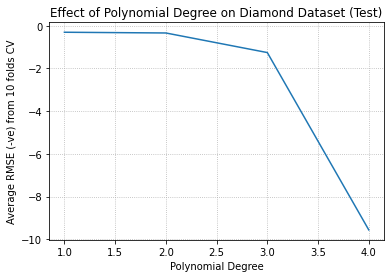

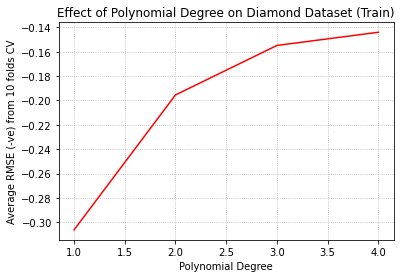

In [ ]:
poly_result = pd.DataFrame(griddiam_PR.cv_results_)[['mean_test_score','mean_train_score','param_PR__degree','param_model__alpha']]
diam_score = []
diam_train = []
diam_alpha = []
for i in degree_list:
    diam_score.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_test_score)
    diam_train.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_train_score)
    diam_alpha.append(float(poly_result['param_model__alpha'][
        (poly_result.loc[poly_result['param_PR__degree'] == i])
        [['mean_test_score']].idxmax()].to_numpy()))
plt.plot(degree_list,diam_score)
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Diamond Dataset (Test)')
plt.savefig('Q10a.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(degree_list,diam_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Diamond Dataset (Train)')
plt.savefig('Q10b.png',dpi=300,bbox_inches='tight')
plt.show()

## Salient Features

In [ ]:
chY = SelectKBest(score_func=f_regression, k=6)
XTranscode_Test = chY.fit_transform(diamonds.loc[:, diamonds.columns != 'price'], diamonds.price)
column_names = diamonds.loc[:, diamonds.columns != 'price'].columns[chY.get_support()]

b_params = griddiam_PR.best_estimator_.get_params()
b_coefs = b_params['model'].coef_
b_feature_name = list(column_names)
b_names = b_params['PR'].get_feature_names(b_feature_name)
b_sorted_indice = np.argsort(-abs(b_coefs))
salient_features =[b_names[i] for i in b_sorted_indice[:5]]
print ('Top 5 Salient features (bike):',salient_features)

Top 5 Salient features (bike): ['carat', 'x', 'clarity_encoded', 'z', 'color_encoded']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import numpy as np

## Neural Networks

In [ ]:
a_list = [10,20,30,50]
all_combinations = []
for r in range(len(a_list) + 1):
    combinations_object = itertools.combinations_with_replacement(a_list, r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list
all_combinations = all_combinations[1:]

pipe_NN = Pipeline([
    ('model', MLPRegressor(random_state=42,max_iter=1000))
])
                         
param_grid_NN = {
    'model__hidden_layer_sizes': all_combinations,
    'model__alpha': [10.0**x for x in np.arange(-4,2)],
    'model__activation': ['logistic', 'tanh', 'relu']   
}

In [ ]:
griddiam_NN = GridSearchCV(pipe_NN, param_grid=param_grid_NN, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(Xdiam_F, Ydiam_S)

Fitting 10 folds for each of 1242 candidates, totalling 12420 fits
